# Exercise 1: EDA, Data Preperation and feature engineering

In this introductory exercise you will make the first key steps to using a time-series in tensorflow.

You will be using a weather time series dataset recoded by the Max-Planck-Institute
https://www.bgc-jena.mpg.de/wetter/

## Objectives
+ Download the data and get it to work on you machine
+ Explore and visualize the data
+ Clean the data
+ Optimize data representations through feature engineering

## Dataset
This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016.

The dataset can be downloaded under:
https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

## Instructions
## Setup
In contrary to the last excercise I want you to familiarize yourself with the bash commands that you can execute in a jupyter notebook enviroment. Bas commands in jupyter notebook are executed with a ! before the actual command such as this one:

```
!cd /Desktop
```
I want you to download the data into the notebook, unzip it and move the conatinging .csv file to your drive to save it there. To archieve this you will need to mount your drive first.

The bash commands you should look at are:
+ wget
+ cd
+ mv
+ ls
+ unzip
I also want you to read a few minutes in the jupyter "magic commands" such as

```
%%capture
```
which you can add on top of a cell to make it produce no ouput. This can especially be nice if you install a few python packages and dont want the full installation log to show in you notebook and scroll until your fingers bleed. These magic commands can be really useful in may ways.





In [1]:
# Do the bash download here and dont forget to mount your drive before :)

## Task 1
Import the csv data as you did in the last notebooks into a pandas dataframe and get youself a overview of the columns. Check for missing or obviously wrong values and remove them. There are also stategies to interpolate missing or wrong values which can be valuable - but if you dataset is almost "perfect" like in this example there is no need.

Then instead of dealing with 10-minute predictions we will work with hourly predictions in this notebook. Sub sample the dataset into hourly intervals.

In [ ]:
# Import and clean the data

# Sub sample the dataset

## Task 2
Make at least 5 plots of the data in a colum and see if you can identify seasonality, noise and trend in the data. Since you will not compute the characteristics of a dataset by hand every time, a nice tool to use is
```
df.describe().transpose()

```
Look at the data using this. Note that the transpose() method only flips the calculations to the side - try both and see which has a better readability for you - df.describe() is fully valid on its own. 
 However if you mix up the order: df.transpose().describe() - you will get garbage. Also try that to see what it looks like


In [ ]:
# Make the plots here, look at standard deviation etc.

## Task 3
When working with time series, it is common to have data that is not well interpreted by a machine. Consider the example where you want to predict bakery sales based on the past. If you are predicting sales on days and you just give the model One-Hot-Endodings of "Monday", "Tuesday", "Wensday" etc. the model will have no way of knowing that after sunday comes monday, and after wensday comes thursday.

This is an issue because if you do not identify this you will have no way of passing the underlying seasonality to the model - in a way it can understand.


In this dataset there are two big issues that the model can not understand.
Make a histogramm of wind direction and wind speed and see if you can spot what the problem here.
Think of a clever way to represent the information of both columns - or research one


Similar to the wind direction, the time is a very useful form but not in this format. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.
Start by converting this string format to seconds (Do this part yourself)  
Then you can get usable signals by using sine and cosine transforms:


```
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

```
Then examine this transformation with a plot.

Should you not know with what kind of seasonal data you are dealing with is a wise thing to use a fourier transformation to identify peaks in the periodicity. In our case you would be able to see clear peaks at daily and yearly reoccurences of temperature - which makes sence if you think about it.
Dont worry if you did not grasp this last part with the fourier transform. It is not essential to the course - I just want you to keep it in the back of your mind should you ever encounter a dataset where you have no idea what the seasonality is like.

In [ ]:
# do the feature engeneering transformations here

And thats it! Youre done for this week.
For simplicity the next weeks task is a follow-up on this one so you will use the same notebook only further down below. If youre in the flow at the time of reading this you might as well keep going :P

# Excersise 2: Model Selection and working with time windows

## Introduction
Last week you started with preprocessing the data and bringing it into a useful format that the machine can understand and interpret. This week you will go about the actual training of models and making time series predictions.
You will
+ Perform a sensible data split
+ Learn about and play with window Size
+ Train different kinds of model architectures and test them against each other
+ Perform a forecast of the next week after the dataset ends

Please keep in mind that you need to run all prior cells filled with code!


## Task 1
Start by performing a train/val/test data split - it should be (80%, 15%, 5%).
Do not shuffle the data! Do you still remember why?


Normalize the data by taking the mean and the standard deviation from the training dataset.
```
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

```


In [ ]:
# do the split and the normalization here

## Task 2
It is important to understand what time windows are - especially for you use case if you ever apply time series forecasting in real life.

You will need a function that generates those time windos out of your dataset. If you really enjoy coding youre welcome to write one yourself - otherwise just look for a "WindowGenerator" online or ask ChatGPT for a "Window generator class for datasets to use with time series forecasting"

The most simple of models is one where you take the previous dataset example to predict the next one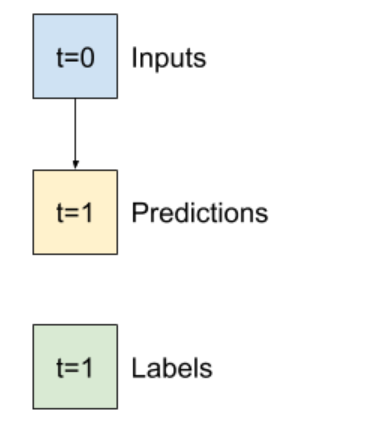


Perform a split into Windows of this size and make a Baseline Model where you predict the temperature in °c for a dataset example. Train it for a few epochs and check the performance on test data.

Measure the performance with MAPE which stands for MeanAbsolutePercentageError. briefly research on how to use it with tensorflow and why it is a sensible metric to use and which others there are.

In [ ]:
# define your window Generator and train the baseline

## Task 3
For the following task you will use this split:
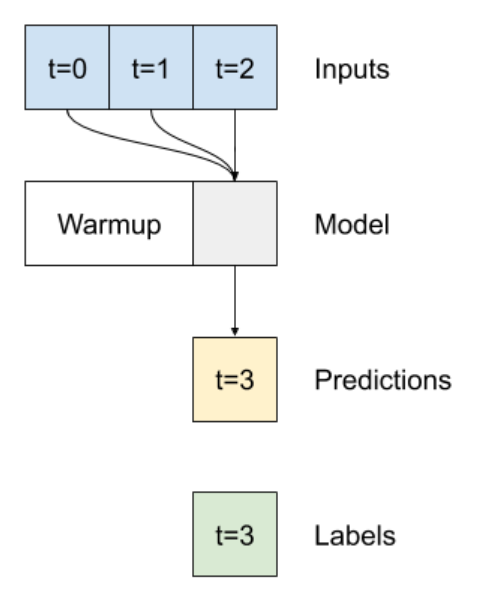


So starting now we will always have the three hours of inputs to predict one label. Call the window generator on you datasets again to perform this.

Your task is to create 2 out of four proposed model architectectures -> take those that you think will perform best. If you have time you can also mix them up and see how they perform.

Those architetures are: RNN, LSTM, CONV1D, Multi-Step-Dense. Evaluate them on the test dataset with the MAPE and bring your results to show next week.

If you have the time and want further practice - play around with the window size to see how performance changes: e.g. give the model the last 100 hours of input to predict the next hour or give it one hour of input and see how well it can predict the next five.



In [2]:
# model 1

In [ ]:
# model 2